# Table of Contents

### 1. Project Background

 - About Dataset
 - Meta Data
### 2. Data Preparation

   - Data Loading
   - Data Cleaning
   - Data Exploration
   
### 3. Bootstrap

### 4. Hypothesis Test

   -  4.1 One-tailed Test
   -  4.2 T test
   
 

#### 1.Project Background

This project is based on the data provided at https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?datasetId=1660669. It's a simple marketing campaign with experiment and control group for A/B testing.  
  
  
  
####  1. Dataset Overview

In this dataset, we delve into Marketing A/B testing, a crucial process for marketing companies striving to launch successful campaigns in a complex market. A/B testing is a randomized experimentation technique where various versions of a variable (e.g., web page, page element, banner) are simultaneously presented to different audience segments. This helps determine which version has the greatest impact and drives key business metrics.

The primary questions of interest to these companies are:

Will the campaign be a success?
If the campaign succeeds, how much of that success can be attributed to the advertisements?
To address the second question, A/B testing is typically conducted. The majority of the audience is exposed to ads (the experimental group), while a smaller portion (the control group) sees a Public Service Announcement (PSA) or nothing in the same space and format as the ads.

The dataset's purpose is to analyze these groups, assess the effectiveness of the ads, estimate potential ad-generated revenue, and determine if any differences between the groups are statistically significant.   


#### 1.2 Data dictionary:

* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw   the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads


### 2. Data preperation

### 2.1 Data Loading

In [ ]:


#importing libraries and data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# loading data

df = pd.read_csv("C:/Users/Welluser/Downloads/AB tetsing/marketing_AB.csv")
df.head()

##### 2.2 Data Cleaning

We find that there is one unecessary column named - Unnamed:0.We will be removing this column

In [4]:
# droping unnecessary column

df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


We see that the column names have " ", so we will replace it with "_"

In [ ]:


# adjusting column names to have a"-" instead of a space " "
df.rename(columns= lambda x: x.replace(" ","_"),inplace=True)
df.head()

##### 2.3 Data Exploration

In [6]:
#EDA Checking for missing data
df.info()
# no missing data,we can move forward with our analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [7]:
# checking for the sample size of the control group(psa) and test group(ad)
df["test_group"].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [8]:
df.groupby("converted")["test_group"].value_counts()

converted  test_group
False      ad            550154
           psa            23104
True       ad             14423
           psa              420
Name: count, dtype: int64

- We see that the sample size for ad is so much larger than the sample size of psa.This can lead to problems with such an imbalance of sample size.We therefore i will be using resampling method called BOOTSTRAPPING to account for the imbalance of sample sizes



- We need to first create subsets of the original data into test group and control group

In [15]:
#creating subsets of the original data
ad_test = df[df["test_group"]=="ad"]
psa_control = df[df["test_group"]=="psa"]


In [16]:
#Calculating the Average conversion rate of each group
ad_conversion =ad_test["converted"].mean()
psa_conversion =psa_control["converted"].mean()

print(ad_conversion,psa_conversion)

0.025546559636683747 0.01785410644448223


### Considering the provided sample data, the average conversion rate for advertisements stands at 2.55%, which is 0.76% higher than the conversion rate for public service announcements (PSAs) at 1.79%. This suggests that running ads may be effective in enhancing the conversion rate.

### However, it's essential to assess whether these findings hold true for a more extensive population. Could these observed differences be attributed to the larger sample size of the ads? To address these questions, we must perform statistical significance tests (such as the z-test or t-test) using data with evenly balanced sample sizes (through bootstrapping).

### 3. Bootstrap Resample

- The Bootstrap method is a resampling approach commonly employed in statistical analysis. Essentially, it entails drawing observations from a dataset repeatedly, with replacement, to generate numerous resampled datasets. This iterative resampling procedure facilitates the estimation of the sampling distribution of a statistic or the derivation of insights regarding population parameters.

- In this project, I will apply the Bootstrap method by resampling from the original dataset to generate 1000 resampled datasets, each comprising sample means for both the experimental and control groups. This resampling technique is particularly useful because it leverages the Central Limit Theorem (CLT), which states that the sampling distribution of the mean of a sufficiently large random sample from any population approaches a normal distribution. By repeatedly resampling, we approximate this normal distribution and gain valuable insights into the variability of our sample means.






In [ ]:
# creating an empty list to store the means
boot_ad=[]

#creating a loop to generate 1000 sample means
for i in range(1000):
    boot_mean=ad_test.sample(frac=1,replace=True)['converted'].mean()
    boot_ad.append(boot_mean)
    
boot_ad=pd.DataFrame(boot_ad)


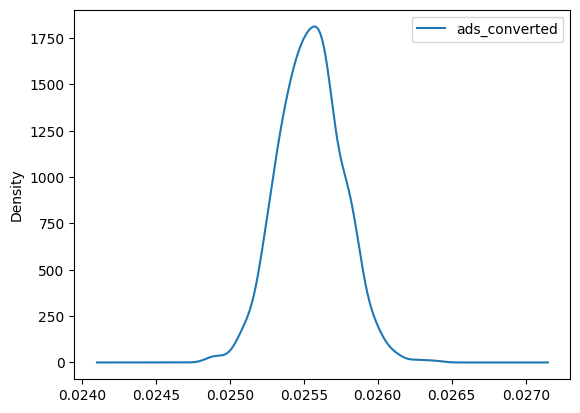

In [64]:
#Plotting the density plot to obsere the distribution 
boot_ad.plot(kind="density")
plt.show()

#### We repeat the process for psa group

In [44]:
boot_psa=[]

for i in range(1000):
    boot_mean=psa_control.sample(frac=1,replace=True)['converted'].mean()
    boot_psa.append(boot_mean)
    
boot_psa=pd.DataFrame(boot_psa)


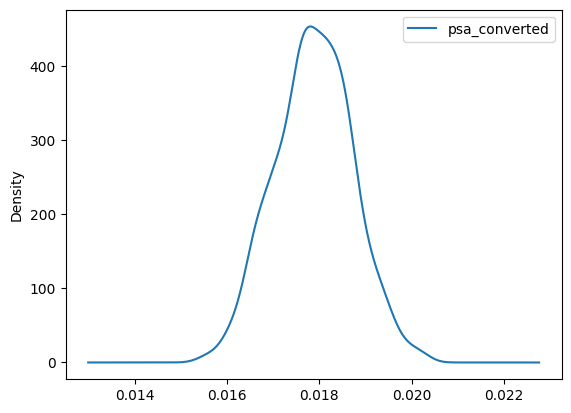

In [63]:
boot_psa.plot(kind="density")
plt.show()

- The bootstrap means of psa group and ad group both follows the normal distribution. Now, we are confident to do hypothesis test by running z-test or t-test based on the bootstrap data we've just got.
- We need to combine the bootstrap dataframe of ad and psa group first before doing further analysis.

In [46]:
#Adding column names
boot_ad.columns = ["ads_converted"]
boot_psa.columns =["psa_converted"]

In [53]:
#concatenating the two dataframes
boot_strap = pd.concat([boot_ad,boot_psa],axis=1)
boot_strap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ads_converted  1000 non-null   float64
 1   psa_converted  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [56]:
#create a diff column, calculating the difference rate between ad_converted and psa_converted
boot_strap['diff']=(boot_strap['ads_converted']-boot_strap['psa_converted'])/boot_strap['psa_converted']
boot_strap.head(10)

,ads_converted,psa_converted,diff
0,0.025568,0.018619,0.373190
1,0.025437,0.017429,0.459449
2,0.025904,0.017982,0.440600
3,0.025541,0.018407,0.387603
4,0.025617,0.017174,0.491643
5,0.025756,0.017939,0.435720
6,0.025288,0.017174,0.472460
7,0.025392,0.018152,0.398905
8,0.025293,0.018534,0.364676
9,0.025490,0.019002,0.341441


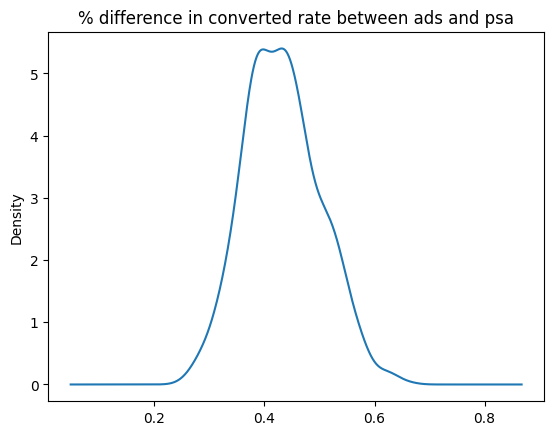

In [66]:
#plotting density graph of difference in conversion rate to check the distribution
ax=boot_strap['diff'].plot(kind='density')
ax.set_title('% difference in converted rate between ads and psa')
plt.show()

### 4. Hypothesis Test

I will be perfroming a 1 tailed test since we want to determine if ad group significantly improves the conversion rate.

- 4.1 One -tailed test
- Null Hypothesis (H0): The conversion rate of the ad group is equal to or less than the conversion rate of the psa group. 
- Alternative Hypothesis (H1): The conversion rate of the ad group is significantly greater than the conversion rate of the psa group.

In [69]:
from scipy import stats

boot_ad_converted=boot_strap['ads_converted']
boot_psa_converted=boot_strap['psa_converted']

alpha =0.05
boot_ad_mean=boot_ad_converted.mean()
boot_psa_mean=boot_psa_converted.mean()
boot_ad_std=boot_ad_converted.std()
boot_psa_std=boot_psa_converted.std()

pooled_std=np.sqrt((boot_ad_std**2+boot_psa_std**2)/2)
z_score=(boot_ad_mean-boot_psa_mean)/pooled_std
p_value=1-stats.norm.cdf(z_score)

print('z score',z_score)
print('P Value',p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference .")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

z score 12.477314569259793
P Value 0.0
Reject the null hypothesis. There is a significant difference.


In [71]:
t_stat, p_value = stats.ttest_ind(boot_ad_converted, boot_psa_converted, alternative='greater', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

T-statistic: 279.001235535134
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


### In both test Z test and t test the p value is less than the signi the null hypothesis is rejected 